In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pyfonts import load_font
from highlight_text import fig_text, ax_text

In [2]:
bl_funding = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-15/bl_funding.csv')

In [3]:
bl_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           26 non-null     int64  
 1   nominal_gbp_millions           26 non-null     float64
 2   gia_gbp_millions               26 non-null     float64
 3   voluntary_gbp_millions         26 non-null     float64
 4   investment_gbp_millions        26 non-null     float64
 5   services_gbp_millions          26 non-null     float64
 6   other_gbp_millions             26 non-null     float64
 7   year_2000_gbp_millions         18 non-null     float64
 8   inflation_adjustment           26 non-null     float64
 9   total_y2000_gbp_millions       26 non-null     float64
 10  percentage_of_y2000_income     26 non-null     float64
 11  gia_y2000_gbp_millions         26 non-null     float64
 12  voluntary_y2000_gbp_millions   26 non-null     float

In [4]:
bl_funding.head(2)

,year,nominal_gbp_millions,gia_gbp_millions,voluntary_gbp_millions,investment_gbp_millions,services_gbp_millions,other_gbp_millions,year_2000_gbp_millions,inflation_adjustment,total_y2000_gbp_millions,percentage_of_y2000_income,gia_y2000_gbp_millions,voluntary_y2000_gbp_millions,investment_y2000_gbp_millions,services_y2000_gbp_millions,other_y2000_gbp_millions,gia_as_percent_of_peak_gia
0,2023,151.8,127.8,8.2,3.0,12.8,0.0,NaN,1818796.76,83.461772,0.757366,70.266235,4.508475,1.649442,7.037620,0.0,0.743019
1,2022,147.6,116.5,14.9,0.8,15.6,0.0,NaN,1674338.62,88.154211,0.799947,69.579713,8.899036,0.477801,9.317112,0.0,0.735759


In [5]:
bl_funding["year"].nunique()

26

In [6]:
# Prepare data for 5x5 subplots
df = bl_funding[bl_funding["year"] > 1998]

In [7]:
df = df[["year", "gia_y2000_gbp_millions", "voluntary_y2000_gbp_millions", "investment_y2000_gbp_millions", "services_y2000_gbp_millions"]]

In [8]:
df = pd.melt(df, id_vars='year', value_vars=["gia_y2000_gbp_millions", "voluntary_y2000_gbp_millions", "investment_y2000_gbp_millions", "services_y2000_gbp_millions"])

In [9]:
df = df.sort_values([ "year", "variable"], ascending=[False, True]).reset_index(drop=True)

In [10]:
# Prepare data for rectangle width and height
df['width'] = ((df['value'])**0.5).round(3)
df['height'] = ((df['value'])**0.5).round(3)

In [11]:
df.head()

,year,variable,value,width,height
0,2023,gia_y2000_gbp_millions,70.266235,8.382,8.382
1,2023,investment_y2000_gbp_millions,1.649442,1.284,1.284
2,2023,services_y2000_gbp_millions,7.037620,2.653,2.653
3,2023,voluntary_y2000_gbp_millions,4.508475,2.123,2.123
4,2022,gia_y2000_gbp_millions,69.579713,8.341,8.341


In [12]:
# Postions of negative width and height
negative_positions_width = [1, 2, 5, 6, 9, 10, 13, 14, 17, 18, 21, 22, 25, 26, 29, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62,
                           65, 66, 69, 70, 73, 74, 77, 78, 81, 82, 85, 86, 89, 90, 93, 94, 97, 98]

negative_positions_height = [2, 3, 6, 7, 10, 11, 14, 15, 18, 19, 22, 23, 26, 27, 30, 31, 34, 35, 38, 39, 42, 43, 46, 47, 50, 51, 54, 55, 58, 59, 62, 63,
                            66, 67, 70, 71, 74, 75, 78, 79, 82, 83, 86, 87, 90, 91, 94, 95, 98, 99]

# Convert width and height  
df["width"] = df.apply(lambda row: -abs(row["width"]) if row.name in negative_positions_width else abs(row["width"]), axis=1)
df["height"] = df.apply(lambda row: -abs(row["height"]) if row.name in negative_positions_height else abs(row["height"]), axis=1)

In [13]:
df.head()

,year,variable,value,width,height
0,2023,gia_y2000_gbp_millions,70.266235,8.382,8.382
1,2023,investment_y2000_gbp_millions,1.649442,-1.284,1.284
2,2023,services_y2000_gbp_millions,7.037620,-2.653,-2.653
3,2023,voluntary_y2000_gbp_millions,4.508475,2.123,-2.123
4,2022,gia_y2000_gbp_millions,69.579713,8.341,8.341


In [14]:
idx_max = df.groupby("variable")["value"].idxmax()

In [15]:
txt_annotation = df.loc[idx_max, ["year", "variable", "value", "width", "height"]].reset_index(drop=True)

In [16]:
txt_annotation

,year,variable,value,width,height
0,2007,gia_y2000_gbp_millions,94.568581,9.725,9.725
1,2006,investment_y2000_gbp_millions,1.731410,-1.316,1.316
2,1999,services_y2000_gbp_millions,28.694735,-5.357,-5.357
3,2006,voluntary_y2000_gbp_millions,28.989294,5.384,-5.384


In [17]:
chango = load_font(
  font_url="https://github.com/google/fonts/blob/main/ofl/chango/Chango-Regular.ttf?raw=true"
)

In [18]:
color_dict = {
   "gia_y2000_gbp_millions": "#ccad66",
   "voluntary_y2000_gbp_millions": "#cc7158",
   "investment_y2000_gbp_millions": "#816d41",
   "services_y2000_gbp_millions": "#d58951"
}
df["color"] = df["variable"].map(color_dict)

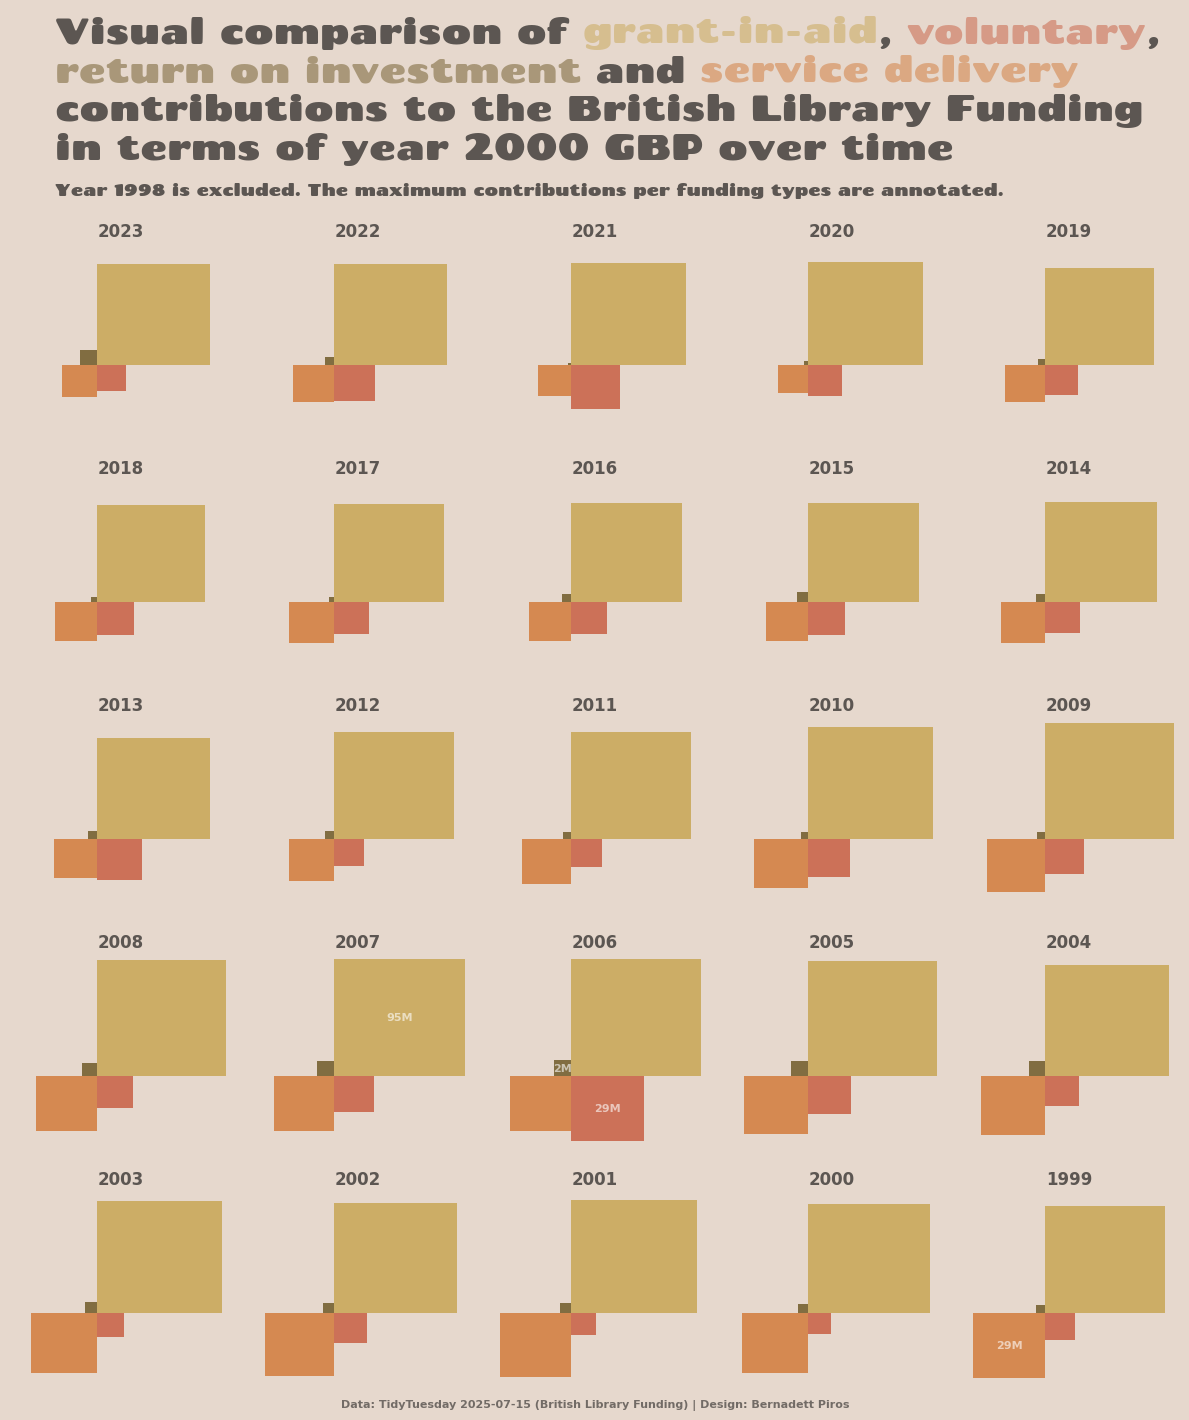

In [28]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
plt.subplots_adjust(top=0.8)

# Fixed x, y position
x, y = 0.5, 0.5

# Loop through the axes and draw 4 rectangles in each
for ax, start_idx in zip(axes.flatten(), range(0, len(df), 4)):  
    # Loop starts at start_idx and iterate up to 4 elements
    for i in range(start_idx, min(start_idx + 4, len(df))):  
        w, h, c = df.loc[i, "width"], df.loc[i, "height"], df.loc[i, "color"]        
        
        my_rectangle = patches.Rectangle(
            xy=(x, y),  
            width=w,    
            height=h,   
            facecolor=c,  
            linewidth=2
        )
        ax.add_patch(my_rectangle)    

        # Axis limits and labels 
        ax.set_xlim(-6, 10.5)
        ax.set_ylim(-6, 10.5)    
        ax.set_title(df["year"][i], weight="bold", alpha=0.6)  
        ax.tick_params(length=0)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines[["top", "right", "bottom", "left"]].set_visible(False) 
        ax.set_facecolor("#e6d8cd")

# Annotations
axes[3, 1].text(x+9.725/2, y+9.725/2, "95M", color="white", fontsize=8, weight="bold", alpha=0.6, ha="center", va="center")
axes[3, 2].text(x-1.316/2, y+1.316/2, "2M", color="white", fontsize=8, weight="bold", alpha=0.6, ha="center", va="center")
axes[4, 4].text(x-5.357/2, y-5.357/2, "29M", color="white", fontsize=8, weight="bold", alpha=0.6, ha="center", va="center")
axes[3, 2].text(x+5.384/2, y-5.384/2, "29M", color="white", fontsize=8, weight="bold", alpha=0.6, ha="center", va="center")

# Background, layout adjustment, texts
fig.set_facecolor("#e6d8cd")

plt.tight_layout()

fig_text(0.05, 1.16, s="Visual comparison of <grant-in-aid>, <voluntary>,\n<return on investment> and <service delivery>\ncontributions to the British Library Funding\nin terms of year 2000 GBP over time",
         font=chango, size=26, weight="heavy", alpha=0.6, highlight_textprops=[
             {"color": "#ccad66"},
             {"color": "#cc7158"},
             {"color": "#816d41"},
             {"color": "#d58951"}
             ])

fig.text(0.05, 1.01, "Year 1998 is excluded. The maximum contributions per funding types are annotated.", font=chango, size=12, weight="heavy", alpha=0.6)

fig.text(0.5, 0, "Data: TidyTuesday 2025-07-15 (British Library Funding) | Design: Bernadett Piros", size=8, weight="bold", alpha=0.5, ha="center")

plt.show()

#fig.savefig("2025-07-15.png", bbox_inches='tight', pad_inches=0.2)